In [3]:
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## **(질문) 최동원 선수가 현역선수라면 연봉을 얼마나 받을까?**

- 회귀 분석으로 진행
- kbo 기록실을 통해 자료 수집

In [37]:
driver = webdriver.Chrome("C:/Users/sori4/.cache/selenium/chromedriver/win64/119.0.6045.105\chromedriver.exe")
driver.maximize_window()
driver.get("https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx?sort=ERA_RT")

## (1) 투수 정보 웹크롤링
- 1983-1988년 데이터와 2015-2020년도 column이 달라 따로 크롤링

In [29]:
#데이터 적재
name = []; team = []; ERA = []; G = []; CG = []; SHO = []; W = []; L = []; year= [];
SV = []; HLD = []; WPCT = []; TBF = []; IP = []; H = []; HR = []; BB = []; HBP = []; SO = []; R = []; ER = []

# 1983-1988년 수집
for season_index in range(2, 9):
    # 시즌 선택
    btn = driver.find_element(By.CSS_SELECTOR, f"#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({season_index})")
    btn.click()

    # 팀 정보 요소의 ID를 사용하여 대기
    element_id = "cphContents_cphContents_cphContents_ddlSeason_ddlSeason"

    # 대기 조건을 해당 요소의 존재로 변경
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, element_id)))

    # 선택한 시즌의 데이터 수집
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    length = len(soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')) + 1
    for i in range(1, length):
        get_source = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child(' + str(i) + ')')
        # 이름 수집 파트
        name_element = get_source[0].select_one('td:nth-child(2) a').get_text(strip=True)
        name.append(name_element)

        # 팀 수집 파트
        team_element = get_source[0].select_one('td:nth-child(3)').get_text(strip=True)
        team.append(team_element)

         #ERA
        era_element = get_source[0].select_one('td.asc').get_text()
        ERA.append(era_element)
        
        g_element = get_source[0].select_one('td:nth-child(5)').get_text()
        G.append(g_element)
            
        cg_element = get_source[0].select_one('td:nth-child(6)').get_text()
        CG.append(cg_element)
            
        sho_element = get_source[0].select_one('td:nth-child(7)').get_text()
        SHO.append(sho_element)
         
        w_element = get_source[0].select_one('td:nth-child(8)').get_text()
        W.append(w_element)
         
        l_element = get_source[0].select_one('td:nth-child(9)').get_text()
        L.append(l_element)
            
        sv_element = get_source[0].select_one('td:nth-child(10)').get_text()
        SV.append(sv_element)
            
        hld_element = get_source[0].select_one('td:nth-child(11)').get_text()
        HLD.append(hld_element)
            
        wpct_element = get_source[0].select_one('td:nth-child(12)').get_text()
        WPCT.append(wpct_element)
           
        tbf_element = get_source[0].select_one('td:nth-child(13)').get_text()
        TBF.append(tbf_element)
            
        ip_element = get_source[0].select_one('td:nth-child(14)').get_text()
        IP.append(ip_element)
           
        h_element = get_source[0].select_one('td:nth-child(15)').get_text()
        H.append(h_element)
           
        hr_element = get_source[0].select_one('td:nth-child(16)').get_text()
        HR.append(hr_element)
            
        bb_element = get_source[0].select_one('td:nth-child(17)').get_text()
        BB.append(bb_element)
          
        hbp_element = get_source[0].select_one('td:nth-child(18)').get_text()
        HBP.append(hbp_element)
            
        so_element = get_source[0].select_one('td:nth-child(19)').get_text()
        SO.append(so_element)
            
        r_element = get_source[0].select_one('td:nth-child(20)').get_text()
        R.append(r_element)
            
        er_element = get_source[0].select_one('td:nth-child(21)').get_text()
        ER.append(er_element)
        
        year_element = 1983 + season_index - 3
        year.append(year_element)

In [30]:
pd.set_option('display.max_columns', None)

df_pitcher = pd.DataFrame(
    {'name' : name,
     'team' : team,
     'ERA' : ERA,
     'G' : G,
     'CG' : CG,
     'SHO' : SHO, 
     'W' : W,
     'L' : L,
     'SV' : SV,
     'HLD' : HLD, 
     'WPCT' : WPCT,
     'TBF' : TBF,
     'IP' : IP,
     'H' : H,
     'HR' : HR,
     'BB' : BB,
     'HBP' : HBP,
     'SO' : SO,
     'R' : R,
     'ER' : ER,
     'year' : year})

df_pitcher

,name,team,ERA,G,CG,SHO,W,L,SV,HLD,WPCT,TBF,IP,H,HR,BB,HBP,SO,R,ER,year
0,페디,NC,2.00,30,0,0,20,6,0,0,0.769,708,180 1/3,137,9,35,4,209,46,40,1982
1,안우진,키움,2.39,24,0,0,9,7,0,0,0.563,608,150 2/3,121,5,38,1,164,44,40,1982
2,뷰캐넌,삼성,2.54,30,1,0,12,8,0,0,0.600,784,188,174,4,43,6,139,71,53,1982
3,후라도,키움,2.65,30,0,0,11,8,0,0,0.579,763,183 2/3,164,7,41,9,147,64,54,1982
4,알칸타라,두산,2.67,31,0,0,13,9,0,0,0.591,777,192,171,16,35,5,162,67,57,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,신완근,태평양,3.95,37,1,0,2,9,3,0,0.182,585,139,141,8,44,3,73,71,61,1988
172,김용남,빙그레,4.11,27,1,0,8,6,1,0,0.571,525,122 2/3,150,9,25,2,41,67,56,1988
173,유종겸,MBC,4.13,23,6,1,4,7,1,0,0.364,484,109,102,7,65,3,45,58,50,1988
174,김홍명,빙그레,4.27,24,7,1,8,13,0,0,0.381,656,151 2/3,158,8,72,4,61,75,72,1988


In [31]:
df_pitcher.to_csv("df_pitcher_8388.csv", index=False)

In [10]:
#2015-2020 크롤링

#데이터 적재
name = []; team = []; ERA = []; G = []; CG = []; SHO = []; W = []; L = []; year= []; WHIP=[];
SV = []; HLD = []; WPCT = []; TBF = []; IP = []; H = []; HR = []; BB = []; HBP = []; SO = []; R = []; ER = []


for season_index in range(34, 42):
    # 시즌 선택
    btn = driver.find_element(By.CSS_SELECTOR, f"#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({season_index})")
    btn.click()

    # 팀 정보 요소의 ID를 사용하여 대기
    element_id = "cphContents_cphContents_cphContents_ddlSeason_ddlSeason"

    # 대기 조건을 해당 요소의 존재로 변경
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, element_id)))

    # 선택한 시즌의 데이터 수집
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    length = len(soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')) + 1
    for i in range(1, length):
        get_source = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child(' + str(i) + ')')
        # 이름 수집 파트
        name_element = get_source[0].select_one('td:nth-child(2) a').get_text(strip=True)
        name.append(name_element)

        # 팀 수집 파트
        team_element = get_source[0].select_one('td:nth-child(3)').get_text(strip=True)
        team.append(team_element)

         #ERA
        era_element = get_source[0].select_one('td.asc').get_text()
        ERA.append(era_element)
        
        g_element = get_source[0].select_one('td:nth-child(5)').get_text()
        G.append(g_element)
            
        w_element = get_source[0].select_one('td:nth-child(6)').get_text()
        W.append(w_element)
         
        l_element = get_source[0].select_one('td:nth-child(7)').get_text()
        L.append(l_element)
            
        sv_element = get_source[0].select_one('td:nth-child(8)').get_text()
        SV.append(sv_element)
            
        hld_element = get_source[0].select_one('td:nth-child(9)').get_text()
        HLD.append(hld_element)
            
        wpct_element = get_source[0].select_one('td:nth-child(10)').get_text()
        WPCT.append(wpct_element)
            
        ip_element = get_source[0].select_one('td:nth-child(11)').get_text()
        IP.append(ip_element)
           
        h_element = get_source[0].select_one('td:nth-child(12)').get_text()
        H.append(h_element)
           
        hr_element = get_source[0].select_one('td:nth-child(13)').get_text()
        HR.append(hr_element)
            
        bb_element = get_source[0].select_one('td:nth-child(14)').get_text()
        BB.append(bb_element)
          
        hbp_element = get_source[0].select_one('td:nth-child(15)').get_text()
        HBP.append(hbp_element)
            
        so_element = get_source[0].select_one('td:nth-child(16)').get_text()
        SO.append(so_element)
            
        r_element = get_source[0].select_one('td:nth-child(17)').get_text()
        R.append(r_element)
            
        er_element = get_source[0].select_one('td:nth-child(18)').get_text()
        ER.append(er_element)
        
        whip_element = get_source[0].select_one('td:nth-child(19)').get_text()
        WHIP.append(whip_element)
        
        year_element = 1983 + season_index - 3
        year.append(year_element)

In [11]:
pd.set_option('display.max_columns', None)

df_pitcher2 = pd.DataFrame(
    {'name' : name,
     'team' : team,
     'ERA' : ERA,
     'G' : G,
     'W' : W,
     'L' : L,
     'SV' : SV,
     'HLD' : HLD, 
     'WPCT' : WPCT,
     'IP' : IP,
     'H' : H,
     'HR' : HR,
     'BB' : BB,
     'HBP' : HBP,
     'SO' : SO,
     'R' : R,
     'ER' : ER,
     'WHIP' : WHIP,
     'year' : year})

df_pitcher2

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year
0,미란다,두산,2.33,28,14,5,0,0,0.737,173 2/3,135,11,63,1,225,49,45,1.14,2014
1,백정현,삼성,2.63,27,14,5,0,0,0.737,157 2/3,142,15,54,2,109,54,46,1.24,2014
2,고영표,KT,2.92,26,11,6,0,1,0.647,166 2/3,147,9,27,14,130,59,54,1.04,2014
3,요키시,키움,2.93,31,16,9,0,0,0.640,181 1/3,171,12,46,4,131,71,59,1.20,2014
4,원태인,삼성,3.06,26,14,7,0,0,0.667,158 2/3,147,11,51,5,129,59,54,1.25,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,김민우,한화,4.00,29,14,10,0,0,0.583,155 1/3,131,15,76,7,125,71,69,1.33,2021
162,스트레일리,롯데,4.07,31,10,12,0,0,0.455,165 2/3,162,12,67,7,164,85,75,1.38,2021
163,신민혁,NC,4.41,30,9,6,0,0,0.600,145,155,17,44,5,107,75,71,1.37,2021
164,임기영,KIA,4.88,28,8,8,0,0,0.500,153,155,15,45,11,129,85,83,1.31,2021


In [12]:
df_pitcher2.to_csv("df_pitcher_1520.csv", index=False)

- ERA : 평균 자책점 Earned Run Average (투수에게만 해당되는 확률), 낮을 수록 투수가 점수를 허용하지 않았다는 뜻
- G : 게임 횟수
- W : win
- L :lose
- SV : save, 마무리 투수를 평가할 때 많이 사용하는 지표(역전을 허용하지 않고 경기를 마무리했을 때 주어지는 기록) 
- HLD: 홀드, 세이브 규칙을 준수하여 해당 조건을 충족시키고 경기 도중 물러난 (중간계투) 구원투수에게 홀드 기록 (어쩌면 최동훈 투수에게는 필요없는 카테고리일 수 있겠다)
- WPCT : Winning percentage, 게임 횟수에서 승리한 경기 기록
- IP:Inning Piched, 투수 이닝(한 회를 이르는 말, 양 팀이 공격과 수비를 한 번 씩 끝내는 동안을 이른다.) 수
- H:Hits, 피안타(안타를 맞은 갯수)
- HR : Home runs 홈런을 맞은 개수
- BB : Bases on balls 볼 넷의 갯수(볼넷이 많을 수록 제구에 의심)
- HBP : hit by pitch 사구(데드볼)
- SO : strike out 삼진아웃 (볼넷과 반대개념)
- R : Runs 특점 당한 갯수
- ER : Earned run, 투수가 허용한 자책점
- WHIP : wallk plus hits divided by inning pitched 한 이닝에 볼넷이나 안타를 허용하는 횟수 (출루가 많을 수록 방어율이 떨어진다.)

## (2) 연봉 데이터 크롤링
- 2015-2020년 선수에서만 연봉데이터를 구할 수 있으며, 그 중에서도 일부만 표시

In [38]:
salary = []
salary_n = []

#길이가 맞지 않은 관계로 열로 만들어서 진행
length = [21, 18, 20, 26, 28, 21]
num = 0

for season_index in range(34, 40):
    # 시즌 선택
    btn = driver.find_element(By.CSS_SELECTOR, f"#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({season_index})")
    btn.click()

    # 팀 정보 요소의 ID를 사용하여 대기
    element_id = "cphContents_cphContents_cphContents_ddlSeason_ddlSeason"

    # 대기 조건을 해당 요소의 존재로 변경
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, element_id)))

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    # # WebDriverWait를 이용하여 length 값을 정확하게 가져올 때까지 대기
    
    # length = len(soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')) + 1
    for i in range(1, length[num]):
        btn1 = driver.find_element(By.CSS_SELECTOR, f"#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i}) > td:nth-child(2) > a")
        time.sleep(2)
        btn1.click()
        
        # element_id = "cphContents_cphContents_cphContents_playerProfile_lblName"
    
        # # 대기 조건을 해당 요소의 존재로 변경
        # WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, element_id)))
        
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")

        #이름 수집
        get_name = soup.select_one("#cphContents_cphContents_cphContents_playerProfile_lblName")
        get_name_re = soup.select_one("#cphContents_cphContents_cphContents_ucRetireInfo_lblName")

        if get_name:
            salary_n.append(get_name.get_text(strip=True))

        elif get_name_re:
            salary_n.append(get_name_re.get_text(strip=True))

        #연봉 수집
        get_salary = soup.select_one("#cphContents_cphContents_cphContents_playerProfile_lblSalary")

        if get_salary:
            salary.append(get_salary.get_text(strip=True))
        else:
            salary.append(None)
        
         driver.back()
        
    if num < len(length):
        num += 1
    else:
        break


In [41]:
df_s = pd.DataFrame({'name' : salary_n,
                     'salary' : salary})
df_s

,name,salary
0,양현종,50000만원
1,해커,None
2,피가로,None
3,우규민,25000만원
4,린드블럼,None
...,...,...
123,양현종,50000만원
124,박세웅,150000만원
125,박종훈,50000만원
126,서폴드,None


In [42]:
df_s.to_csv("salary_df.csv", index = None)

## (3) 데이터 전처리
- 크롤링 과정에서 생긴 불필요한 자료 삭제
- 1980년대 자료와 2010년대 자료 행 통일하기 위해서 일부 삭제하고 'WHIP'라는 파생변수 생성
- 연봉자료가 없는 2010년대 자료 삭제

In [5]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

df_salary = pd.read_csv("./salary_df.csv")
df_pitcher1 = pd.read_csv("./df_pitcher_8388.csv")
df_pitcher2 = pd.read_csv("./df_pitcher_1520.csv")
df_salary

,name,salary
0,양현종,50000만원
1,해커,NaN
2,피가로,NaN
3,우규민,25000만원
4,린드블럼,NaN
...,...,...
123,양현종,50000만원
124,박세웅,150000만원
125,박종훈,50000만원
126,서폴드,NaN


In [6]:
#전처리 진행
df_pitcher1 = df_pitcher1[df_pitcher1['year'] != 1982]
df_pitcher1.reset_index(drop=True, inplace=True)
df_pitcher1

,name,team,ERA,G,CG,SHO,W,L,SV,HLD,WPCT,TBF,IP,H,HR,BB,HBP,SO,R,ER,year
0,하기룡,MBC,2.34,36,6,2,10,11,4,0,0.476,696,173 1/3,137,4,48,8,73,57,45,1983
1,장명부,삼미,2.36,60,36,6,30,16,6,0,0.652,1712,427 1/3,388,19,106,16,220,138,112,1983
2,유종겸,MBC,2.40,34,4,0,8,7,5,0,0.533,560,139,103,8,50,5,74,45,37,1983
3,박상열,OB,2.49,30,7,1,10,9,0,0,0.526,716,173 1/3,162,11,44,14,68,57,48,1983
4,이길환,MBC,2.51,33,10,4,15,7,4,0,0.682,845,208 1/3,184,8,56,11,85,68,58,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,신완근,태평양,3.95,37,1,0,2,9,3,0,0.182,585,139,141,8,44,3,73,71,61,1988
155,김용남,빙그레,4.11,27,1,0,8,6,1,0,0.571,525,122 2/3,150,9,25,2,41,67,56,1988
156,유종겸,MBC,4.13,23,6,1,4,7,1,0,0.364,484,109,102,7,65,3,45,58,50,1988
157,김홍명,빙그레,4.27,24,7,1,8,13,0,0,0.381,656,151 2/3,158,8,72,4,61,75,72,1988


In [7]:
df_pitcher2 = df_pitcher2[(df_pitcher2['year'] != 2014)&(df_pitcher2['year'] != 2021)]
df_pitcher2.reset_index(drop=True, inplace=True)
df_pitcher2

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year
0,양현종,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,18,78,7,157,52,50,1.24,2015
1,해커,NC,3.13,31,19,5,0,0,0.792,204,174,14,36,25,164,81,71,1.03,2015
2,피가로,삼성,3.38,25,13,7,0,0,0.650,165,154,16,51,7,117,66,62,1.24,2015
3,우규민,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,13,17,12,119,64,58,1.18,2015
4,린드블럼,롯데,3.56,32,13,11,0,0,0.542,210,196,28,52,12,180,86,83,1.18,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,양현종,KIA,4.70,31,11,10,0,0,0.524,172 1/3,180,13,64,5,149,99,90,1.42,2020
124,박세웅,롯데,4.70,28,8,10,0,0,0.444,147 1/3,177,20,47,8,108,85,77,1.52,2020
125,박종훈,SK,4.81,29,13,11,0,0,0.542,157 1/3,146,14,78,22,134,90,84,1.42,2020
126,서폴드,한화,4.91,28,10,13,0,0,0.435,165,203,19,42,13,97,107,90,1.48,2020


In [183]:
#pitcher1과 pitcher2 열을 정리하기 전에 pitcher2와 salary 먼저 정리하기
df_salary.info() #연봉이 50개밖에 없음
df_salary.name.nunique() #이름도 67개로 겹치는 게 꽤 많음
df_salary2.name.unique()
df_salary2[df_salary2.name == '이용찬'] #이름마다 같은 연봉

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    128 non-null    object
 1   salary  50 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


,name,salary
59,이용찬,40000
100,이용찬,40000


In [8]:
df_p2s = pd.merge(df_pitcher2, df_salary.drop_duplicates('name'), on='name', how='left')
df_p2s_c = df_p2s.dropna(subset=['salary'])
print(df_p2s_c.shape) #(48,20)

#형식 변경
df_p2s_c['salary'] = df_p2s_c['salary'].apply(lambda x : x[:-2])
df_p2s_c['salary'] = df_p2s_c['salary'].astype('int')

df_p2s_c = df_p2s_c.reset_index(drop=True)
df_p2s_c

(48, 20)


,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year,salary
0,양현종,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,18,78,7,157,52,50,1.24,2015,50000
1,우규민,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,13,17,12,119,64,58,1.18,2015,25000
2,김광현,SK,3.72,30,14,6,0,1,0.700,176 2/3,173,19,66,3,160,86,73,1.35,2015,100000
3,장원준,두산,4.08,30,12,12,0,0,0.500,169 2/3,182,13,68,14,128,86,77,1.47,2015,5000
4,차우찬,삼성,4.79,31,13,7,0,1,0.650,173,160,28,74,5,194,98,92,1.35,2015,5000
5,장원준,두산,3.32,27,15,6,0,0,0.714,168,161,14,76,9,137,66,62,1.41,2016,5000
6,양현종,KIA,3.68,31,10,12,0,0,0.455,200 1/3,191,19,77,2,146,96,82,1.34,2016,50000
7,차우찬,삼성,4.73,24,12,6,0,0,0.667,152 1/3,168,16,65,8,120,87,80,1.53,2016,5000
8,장원준,두산,3.14,29,14,9,0,0,0.609,180 1/3,172,12,51,14,125,70,63,1.24,2017,5000
9,차우찬,LG,3.43,28,10,7,0,0,0.588,175 2/3,171,20,38,7,157,75,67,1.19,2017,5000


C:\Users\sori4\AppData\Local\Temp\ipykernel_24276\1230474882.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_p2s_c.corr(), annot=True)


<Axes: >

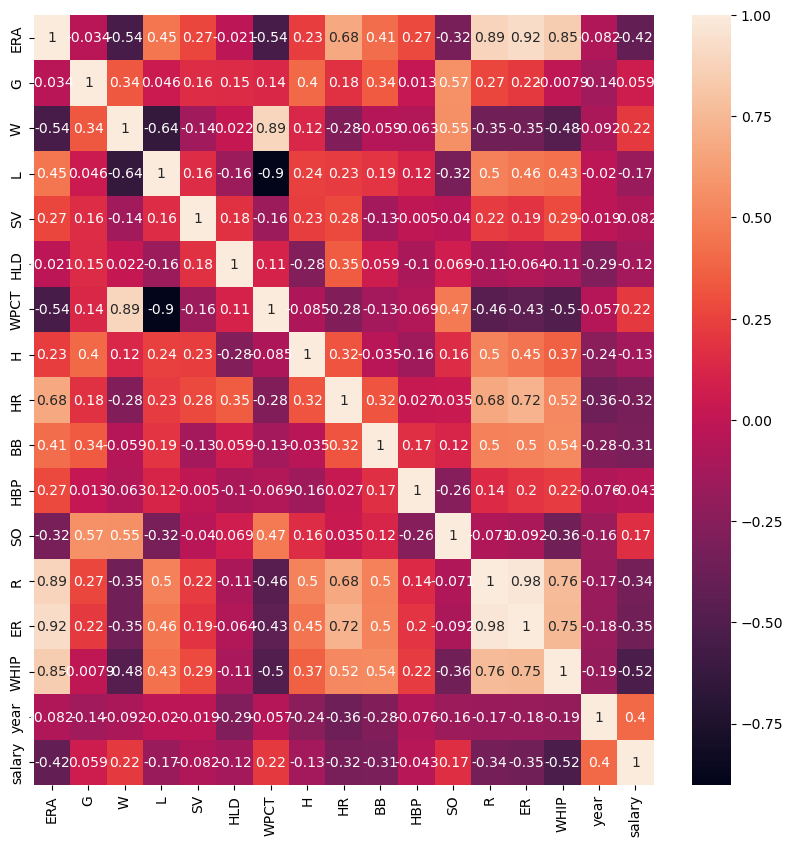

In [185]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_p2s_c.corr(), annot=True)


- 연봉과 가장 연관있어보이는 것은 WHIP(음), ERA(음)으로 보인다.

- 연관 없어보이는 요소 (-0.2 ~ 0.2) : G, L, SV, HLD, H, HBP, SO
- 연관 없어보이는 요소 (-0.3 ~ 0.3) : W, WPCT


In [9]:
y= df_p2s_c.pop('salary')
df_pitchers2_s = df_p2s_c
df_pitchers2_s

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year
0,양현종,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,18,78,7,157,52,50,1.24,2015
1,우규민,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,13,17,12,119,64,58,1.18,2015
2,김광현,SK,3.72,30,14,6,0,1,0.700,176 2/3,173,19,66,3,160,86,73,1.35,2015
3,장원준,두산,4.08,30,12,12,0,0,0.500,169 2/3,182,13,68,14,128,86,77,1.47,2015
4,차우찬,삼성,4.79,31,13,7,0,1,0.650,173,160,28,74,5,194,98,92,1.35,2015
5,장원준,두산,3.32,27,15,6,0,0,0.714,168,161,14,76,9,137,66,62,1.41,2016
6,양현종,KIA,3.68,31,10,12,0,0,0.455,200 1/3,191,19,77,2,146,96,82,1.34,2016
7,차우찬,삼성,4.73,24,12,6,0,0,0.667,152 1/3,168,16,65,8,120,87,80,1.53,2016
8,장원준,두산,3.14,29,14,9,0,0,0.609,180 1/3,172,12,51,14,125,70,63,1.24,2017
9,차우찬,LG,3.43,28,10,7,0,0,0.588,175 2/3,171,20,38,7,157,75,67,1.19,2017


In [10]:
#공동 열로만 정리하기
df_pitcher1.drop(columns=['CG', 'SHO', 'TBF'], inplace=True)

#이닝 분수를 실수로 만들기
from fractions import Fraction
df_pitcher1['IP_f'] = df_pitcher1['IP'].apply(lambda x: round(float(sum(Fraction(part) for part in str(x).split())),3))
df_pitchers2_s['IP_f'] = df_pitchers2_s['IP'].apply(lambda x: round(float(sum(Fraction(part) for part in str(x).split())),3))
df_pitcher1

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,year,IP_f
0,하기룡,MBC,2.34,36,10,11,4,0,0.476,173 1/3,137,4,48,8,73,57,45,1983,173.333
1,장명부,삼미,2.36,60,30,16,6,0,0.652,427 1/3,388,19,106,16,220,138,112,1983,427.333
2,유종겸,MBC,2.40,34,8,7,5,0,0.533,139,103,8,50,5,74,45,37,1983,139.000
3,박상열,OB,2.49,30,10,9,0,0,0.526,173 1/3,162,11,44,14,68,57,48,1983,173.333
4,이길환,MBC,2.51,33,15,7,4,0,0.682,208 1/3,184,8,56,11,85,68,58,1983,208.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,신완근,태평양,3.95,37,2,9,3,0,0.182,139,141,8,44,3,73,71,61,1988,139.000
155,김용남,빙그레,4.11,27,8,6,1,0,0.571,122 2/3,150,9,25,2,41,67,56,1988,122.667
156,유종겸,MBC,4.13,23,4,7,1,0,0.364,109,102,7,65,3,45,58,50,1988,109.000
157,김홍명,빙그레,4.27,24,8,13,0,0,0.381,151 2/3,158,8,72,4,61,75,72,1988,151.667


In [188]:
df_pitchers2_s

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year,IP_f
0,양현종,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,18,78,7,157,52,50,1.24,2015,184.333
1,우규민,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,13,17,12,119,64,58,1.18,2015,152.667
2,김광현,SK,3.72,30,14,6,0,1,0.700,176 2/3,173,19,66,3,160,86,73,1.35,2015,176.667
3,장원준,두산,4.08,30,12,12,0,0,0.500,169 2/3,182,13,68,14,128,86,77,1.47,2015,169.667
4,차우찬,삼성,4.79,31,13,7,0,1,0.650,173,160,28,74,5,194,98,92,1.35,2015,173.000
5,장원준,두산,3.32,27,15,6,0,0,0.714,168,161,14,76,9,137,66,62,1.41,2016,168.000
6,양현종,KIA,3.68,31,10,12,0,0,0.455,200 1/3,191,19,77,2,146,96,82,1.34,2016,200.333
7,차우찬,삼성,4.73,24,12,6,0,0,0.667,152 1/3,168,16,65,8,120,87,80,1.53,2016,152.333
8,장원준,두산,3.14,29,14,9,0,0,0.609,180 1/3,172,12,51,14,125,70,63,1.24,2017,180.333
9,차우찬,LG,3.43,28,10,7,0,0,0.588,175 2/3,171,20,38,7,157,75,67,1.19,2017,175.667


In [11]:
int_col = ['G', 'W', 'L', 'SV', 'HLD', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'year']
float_col = ['ERA', 'WPCT']

df_pitcher1[float_col] = df_pitcher1[float_col].astype('float')
df_pitcher1[int_col] = df_pitcher1[int_col].astype('int')
df_pitchers2_s[float_col] = df_pitchers2_s[float_col].astype('float')
df_pitchers2_s[int_col] = df_pitchers2_s[int_col].astype('int')

In [12]:
#퍄생변수 만들기
df_pitcher1['WHIP'] = round((df_pitcher1['BB'] + df_pitcher1['H'])/df_pitcher1['IP_f'],2)
df_pitcher1.drop(columns='IP', inplace=True)
df_pitchers2_s.drop(columns='IP', inplace=True)

df_pitchers2_s['WHIP'] = df_pitchers2_s['WHIP'].astype('float')

In [191]:
df_pitcher1.shape, df_pitchers2_s.shape

((159, 19), (48, 19))

In [13]:
#합치기
df_p = pd.concat([df_pitcher1, df_pitchers2_s], axis=0, ignore_index=True)
df_p

,name,team,ERA,G,W,L,SV,HLD,WPCT,H,HR,BB,HBP,SO,R,ER,year,IP_f,WHIP
0,하기룡,MBC,2.34,36,10,11,4,0,0.476,137,4,48,8,73,57,45,1983,173.333,1.07
1,장명부,삼미,2.36,60,30,16,6,0,0.652,388,19,106,16,220,138,112,1983,427.333,1.16
2,유종겸,MBC,2.40,34,8,7,5,0,0.533,103,8,50,5,74,45,37,1983,139.000,1.10
3,박상열,OB,2.49,30,10,9,0,0,0.526,162,11,44,14,68,57,48,1983,173.333,1.19
4,이길환,MBC,2.51,33,15,7,4,0,0.682,184,8,56,11,85,68,58,1983,208.333,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,임찬규,LG,4.08,27,10,9,0,0,0.526,143,14,65,5,138,76,67,2020,147.667,1.41
203,쿠에바스,KT,4.10,27,10,8,0,0,0.556,152,16,46,9,110,80,72,2020,158.000,1.25
204,양현종,KIA,4.70,31,11,10,0,0,0.524,180,13,64,5,149,99,90,2020,172.333,1.42
205,박세웅,롯데,4.70,28,8,10,0,0,0.444,177,20,47,8,108,85,77,2020,147.333,1.52


In [90]:
df_p[df_p.name == '최동원']

,name,team,ERA,G,W,L,SV,HLD,WPCT,H,HR,BB,HBP,SO,R,ER,year,IP_f,WHIP
10,최동원,롯데,2.89,38,9,16,4,0,0.360,202,17,51,8,148,89,67,1983,208.667,1.21
26,최동원,롯데,2.40,51,27,13,6,0,0.675,228,18,68,14,223,91,76,1984,284.667,1.04
50,최동원,롯데,1.92,42,20,9,8,0,0.690,170,7,41,8,161,60,48,1985,225.000,0.94
78,최동원,롯데,1.55,39,19,14,2,0,0.576,204,7,55,6,208,60,46,1986,267.000,0.97
116,최동원,롯데,2.81,32,14,12,2,0,0.538,218,6,61,7,163,80,70,1987,224.000,1.25


## (4) 스케일링 및 예측모델
- 회귀모델 사용

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

In [14]:
df_p_s = df_p.drop(columns='name')
data_team = pd.get_dummies(data=df_p_s, columns = ['team'])
data_team.head(5)

,ERA,G,W,L,SV,HLD,WPCT,H,HR,BB,HBP,SO,R,ER,year,IP_f,WHIP,team_KIA,team_KT,team_LG,team_MBC,team_NC,team_OB,team_SK,team_넥센,team_두산,team_롯데,team_빙그레,team_삼미,team_삼성,team_청보,team_키움,team_태평양,team_해태
0,2.34,36,10,11,4,0,0.476,137,4,48,8,73,57,45,1983,173.333,1.07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.36,60,30,16,6,0,0.652,388,19,106,16,220,138,112,1983,427.333,1.16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.40,34,8,7,5,0,0.533,103,8,50,5,74,45,37,1983,139.000,1.10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.49,30,10,9,0,0,0.526,162,11,44,14,68,57,48,1983,173.333,1.19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.51,33,15,7,4,0,0.682,184,8,56,11,85,68,58,1983,208.333,1.15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [217]:
data_team.shape

(207, 34)

- 어떤 팀에서 활동하느냐에 따라 연봉의 차이가 있을 것이라 생각함.
- 예측 모델을 돌려보기 위해 팀은 일단 제외하고 진행 (과적합이 나왔음)

In [15]:
scaled_feature = ['ERA', 'G', 'W', 'L', 'WPCT', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'IP_f', 'WHIP']
X = df_pitchers2_s[scaled_feature]
test = df_pitcher1[scaled_feature]
test

,ERA,G,W,L,WPCT,H,HR,BB,HBP,SO,R,ER,IP_f,WHIP
0,2.34,36,10,11,0.476,137,4,48,8,73,57,45,173.333,1.07
1,2.36,60,30,16,0.652,388,19,106,16,220,138,112,427.333,1.16
2,2.40,34,8,7,0.533,103,8,50,5,74,45,37,139.000,1.10
3,2.49,30,10,9,0.526,162,11,44,14,68,57,48,173.333,1.19
4,2.51,33,15,7,0.682,184,8,56,11,85,68,58,208.333,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3.95,37,2,9,0.182,141,8,44,3,73,71,61,139.000,1.33
155,4.11,27,8,6,0.571,150,9,25,2,41,67,56,122.667,1.43
156,4.13,23,4,7,0.364,102,7,65,3,45,58,50,109.000,1.53
157,4.27,24,8,13,0.381,158,8,72,4,61,75,72,151.667,1.52


In [16]:
xtr, xval, ytr, yval = train_test_split(X, y, test_size=0.2, random_state=123)
xtr.shape, xval.shape, ytr.shape, yval.shape

((38, 14), (10, 14), (38,), (10,))

In [252]:
#pipline
estimators = (
    ('scaler', StandardScaler()),
    ('clf', LinearRegression())
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', r2_score(ytr, ytr_pred))
print('r2_score(yval) : ', r2_score(yval, yval_pred))

MSE(ytr) :  30769413079.749897
MSE(yval) :  181571793574.619
RMSE(ytr) :  175412.1235255702
RMSE(yval) :  426112.4189396725
r2_score(ytr) :  0.5412970474458918
r2_score(yval) :  0.060164297131430566


- r2_score이 1에 가까울 수록 성능이 높다. 선형회귀는 성능이 좋지 않다.
  1) 스케일링을 Standard로 변경
  2) Lasso, Ridge 활용
  3) 상관관계가 적은 열 제거
  4) 교차검증
  5) 앙상블 활용 RandomForest, Gradient Boosting

In [255]:
# 1. 스케일링 방식 변화 : MinMaxScaler

estimators = (
    ('scaler', MinMaxScaler()),
    ('clf', LinearRegression())
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', r2_score(ytr, ytr_pred))
print('r2_score(yval) : ', r2_score(yval, yval_pred))

#차이 없음

MSE(ytr) :  30769413079.74989
MSE(yval) :  181571793574.61893
RMSE(ytr) :  175412.12352557018
RMSE(yval) :  426112.41893967247
r2_score(ytr) :  0.541297047445892
r2_score(yval) :  0.0601642971314309


In [256]:
# 1. 스케일링 방식 변화 : RobustScaler()

estimators = (
    ('scaler', RobustScaler()),
    ('clf', LinearRegression())
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', r2_score(ytr, ytr_pred))
print('r2_score(yval) : ', r2_score(yval, yval_pred))

#차이 없음

MSE(ytr) :  30769413079.749943
MSE(yval) :  181571793574.61923
RMSE(ytr) :  175412.12352557032
RMSE(yval) :  426112.4189396728
r2_score(ytr) :  0.5412970474458911
r2_score(yval) :  0.060164297131429234


In [257]:
#2. ridge

estimators = (
    ('scaler', StandardScaler()),
    ('clf', Ridge(alpha=10))
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', round(r2_score(ytr, ytr_pred),4))
print('r2_score(yval) : ', round(r2_score(yval, yval_pred),4))

MSE(ytr) :  45751256219.23302
MSE(yval) :  173327945345.22882
RMSE(ytr) :  213895.43290877674
RMSE(yval) :  416326.7290785313
r2_score(ytr) :  0.318
r2_score(yval) :  0.1028


In [259]:
#2. Lasso

estimators = (
    ('scaler', StandardScaler()),
    ('clf', Lasso(alpha=10))
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', round(r2_score(ytr, ytr_pred),4))
print('r2_score(yval) : ', round(r2_score(yval, yval_pred),4))

MSE(ytr) :  30923394629.363667
MSE(yval) :  179441025349.20926
RMSE(ytr) :  175850.48942031316
RMSE(yval) :  423604.7985436535
r2_score(ytr) :  0.539
r2_score(yval) :  0.0712


C:\Users\sori4\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.635e+11, tolerance: 2.549e+08
  model = cd_fast.enet_coordinate_descent(


- 라쏘, 릿지 모두 오히려 선형회귀보다 성능이 좋지 않음
- 상관없는 열을 제거하는 방향 진행

In [260]:
#3. 상관관계가 적은 열 제거
#위에서 확인했을 때 -0.2~0.2사이에 있는 요소 삭제
scaled_feature2 = ['ERA', 'W', 'WPCT', 'HR', 'BB', 'R', 'ER', 'IP_f', 'WHIP']
X2 = df_pitchers2_s[scaled_feature2]
test2 = df_pitcher1[scaled_feature2]
test2

,ERA,W,WPCT,HR,BB,R,ER,IP_f,WHIP
0,2.34,10,0.476,4,48,57,45,173.333,1.07
1,2.36,30,0.652,19,106,138,112,427.333,1.16
2,2.40,8,0.533,8,50,45,37,139.000,1.10
3,2.49,10,0.526,11,44,57,48,173.333,1.19
4,2.51,15,0.682,8,56,68,58,208.333,1.15
...,...,...,...,...,...,...,...,...,...
154,3.95,2,0.182,8,44,71,61,139.000,1.33
155,4.11,8,0.571,9,25,67,56,122.667,1.43
156,4.13,4,0.364,7,65,58,50,109.000,1.53
157,4.27,8,0.381,8,72,75,72,151.667,1.52


In [261]:
xtr, xval, ytr, yval = train_test_split(X2, y, test_size=0.2, random_state=123)
xtr.shape, xval.shape, ytr.shape, yval.shape

((38, 9), (10, 9), (38,), (10,))

In [262]:
#선형회귀 적용
estimators = (
    ('scaler', StandardScaler()),
    ('clf', LinearRegression())
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', r2_score(ytr, ytr_pred))
print('r2_score(yval) : ', r2_score(yval, yval_pred))

MSE(ytr) :  40465714704.18323
MSE(yval) :  182499370951.39154
RMSE(ytr) :  201160.91743721798
RMSE(yval) :  427199.4510195344
r2_score(ytr) :  0.3967469329391605
r2_score(yval) :  0.05536305394986907


추가 전처리 전에는
r2_score(ytr) :  0.5412970474458918
r2_score(yval) :  0.06016429713143056

전처리 후 
r2_score(ytr) :  0.3967469329391605
r2_score(yval) :  0.0553630539498690

로 성능이 저하됨76

In [263]:
#RandomForest, Gradient Boosting 활용

from sklearn.model_selection import cross_val_score

# cross_val_score를 사용하여 교차 검증 수행
scores = cross_val_score(gb(), X, y, cv=5, scoring='r2')  # cv는 폴드 개수, scoring은 성능 지표

# 각 폴드에서의 성능 출력
print('Cross-Validation R^2 Scores:', scores)

# 평균 성능 계산
mean_r2 = scores.mean()
print('Mean R^2:', mean_r2)

Cross-Validation R^2 Scores: [-3.93100029e+02 -4.53684380e-01 -1.28843949e+00  2.89937120e-01
 -4.33896656e-01]
Mean R^2: -78.99722247388097


## 데이터 수집이 잘못되었음으로 데이터를 다시 추출

In [329]:
df_p=pd.read_csv("./df_pitcher_info.csv")
df_p

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,year,WHIP
0,하기룡,MBC,2.34,36,10,11,4,0,0.476,173 1/3,137,4,48,8,73,57,45,1983,1.07
1,장명부,삼미,2.36,60,30,16,6,0,0.652,427 1/3,388,19,106,16,220,138,112,1983,1.16
2,유종겸,MBC,2.40,34,8,7,5,0,0.533,139,103,8,50,5,74,45,37,1983,1.10
3,박상열,OB,2.49,30,10,9,0,0,0.526,173 1/3,162,11,44,14,68,57,48,1983,1.19
4,이길환,MBC,2.51,33,15,7,4,0,0.682,208 1/3,184,8,56,11,85,68,58,1983,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,양현종,KIA,4.70,31,11,10,0,0,0.524,172 1/3,180,13,64,5,149,99,90,2020,1.42
283,박세웅,롯데,4.70,28,8,10,0,0,0.444,147 1/3,177,20,47,8,108,85,77,2020,1.52
284,박종훈,SK,4.81,29,13,11,0,0,0.542,157 1/3,146,14,78,22,134,90,84,2020,1.42
285,서폴드,한화,4.91,28,10,13,0,0,0.435,165,203,19,42,13,97,107,90,2020,1.48


In [330]:
df2015 = pd.read_html("http://www.statiz.co.kr/salary.php?opt=0&sopt=2015&te=")[1]
df2016 = pd.read_html("http://www.statiz.co.kr/salary.php?opt=0&sopt=2016&te=")[1]
df2017 = pd.read_html("http://www.statiz.co.kr/salary.php?opt=0&sopt=2017&te=")[1]
df2018 = pd.read_html("http://www.statiz.co.kr/salary.php?opt=0&sopt=2018&te=")[1]
df2019 = pd.read_html("http://www.statiz.co.kr/salary.php?opt=0&sopt=2019&te=")[1]
df2020 = pd.read_html("http://www.statiz.co.kr/salary.php?opt=0&sopt=2020&te=")[1]

df_salary = pd.concat([df2015, df2016, df2017, df2018, df2019, df2020], axis = 0).reset_index(drop=True) 

In [331]:
df_merge = pd.merge(df_p, df_salary, left_on = ['name', 'year'], right_on = ['선수', '연도'], how = 'inner')
df_merge

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,year,WHIP,선수,연도,팀,연봉(만원),WAR
0,양현종,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,18,78,7,157,52,50,2015,1.24,양현종,2015,KIA,75000,8.135
1,해커,NC,3.13,31,19,5,0,0,0.792,204,174,14,36,25,164,81,71,2015,1.03,해커,2015,NC,60000,5.636
2,우규민,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,13,17,12,119,64,58,2015,1.18,우규민,2015,LG,40000,4.948
3,린드블럼,롯데,3.56,32,13,11,0,0,0.542,210,196,28,52,12,180,86,83,2015,1.18,린드블럼,2015,롯데,120000,6.478
4,밴헤켄,넥센,3.62,32,15,8,0,0,0.652,196 2/3,190,14,67,1,193,92,79,2015,1.31,밴헤켄,2015,넥센,65000,5.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,가뇽,KIA,4.34,28,11,8,0,0,0.579,159 2/3,162,7,64,9,141,86,77,2020,1.42,가뇽,2020,KIA,65000,2.840
72,윌슨,LG,4.42,25,10,8,0,0,0.556,144 2/3,161,13,39,8,109,81,71,2020,1.38,윌슨,2020,LG,90000,1.098
73,양현종,KIA,4.70,31,11,10,0,0,0.524,172 1/3,180,13,64,5,149,99,90,2020,1.42,양현종,2020,KIA,230000,2.522
74,박종훈,SK,4.81,29,13,11,0,0,0.542,157 1/3,146,14,78,22,134,90,84,2020,1.42,박종훈,2020,SK,29000,1.898


In [332]:
df_merge.drop(columns=['선수', '연도', '팀'], inplace=True)
df_merge[df_merge.isnull().any(axis=1)]

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,year,WHIP,연봉(만원),WAR
23,피어밴드,KT,4.45,31,7,13,0,0,0.350,182,231,23,48,10,144,97,90,2016,1.53,35000,NaN
54,김광현,SK,2.51,31,17,6,0,0,0.739,190 1/3,198,13,38,2,180,64,53,2019,1.24,150000,NaN
55,산체스,SK,2.62,28,17,5,0,0,0.773,165,151,2,42,2,148,51,48,2019,1.17,95000,NaN
58,다익손,롯데,4.34,29,6,10,0,0,0.375,149 1/3,164,15,40,6,117,81,72,2019,1.37,60000,NaN
61,요키시,키움,2.14,27,12,7,0,0,0.632,159 2/3,144,6,25,6,115,53,38,2020,1.06,55000,NaN
75,서폴드,한화,4.91,28,10,13,0,0,0.435,165,203,19,42,13,97,107,90,2020,1.48,70000,NaN


In [333]:
df_merge.drop(index = [23,54,55,58,61,75], inplace=True)
df_merge.reset_index(drop=True, inplace=True)
df_merge
#df_salary EDA war 뜻 :  Wins Above Replacement(대체선수 대비 승리 기여도) 야구에서 플레이어를 비교할 떄 기준

,name,team,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,year,WHIP,연봉(만원),WAR
0,양현종,KIA,2.44,32,15,6,0,1,0.714,184 1/3,150,18,78,7,157,52,50,2015,1.24,75000,8.135
1,해커,NC,3.13,31,19,5,0,0,0.792,204,174,14,36,25,164,81,71,2015,1.03,60000,5.636
2,우규민,LG,3.42,25,11,9,0,0,0.550,152 2/3,163,13,17,12,119,64,58,2015,1.18,40000,4.948
3,린드블럼,롯데,3.56,32,13,11,0,0,0.542,210,196,28,52,12,180,86,83,2015,1.18,120000,6.478
4,밴헤켄,넥센,3.62,32,15,8,0,0,0.652,196 2/3,190,14,67,1,193,92,79,2015,1.31,65000,5.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,데스파이네,KT,4.33,35,15,8,0,0,0.652,207 2/3,233,18,68,8,152,105,100,2020,1.45,45000,3.209
66,가뇽,KIA,4.34,28,11,8,0,0,0.579,159 2/3,162,7,64,9,141,86,77,2020,1.42,65000,2.840
67,윌슨,LG,4.42,25,10,8,0,0,0.556,144 2/3,161,13,39,8,109,81,71,2020,1.38,90000,1.098
68,양현종,KIA,4.70,31,11,10,0,0,0.524,172 1/3,180,13,64,5,149,99,90,2020,1.42,230000,2.522


In [317]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 74
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    70 non-null     object 
 1   team    70 non-null     object 
 2   ERA     70 non-null     float64
 3   G       70 non-null     int64  
 4   W       70 non-null     int64  
 5   L       70 non-null     int64  
 6   SV      70 non-null     int64  
 7   HLD     70 non-null     int64  
 8   WPCT    70 non-null     float64
 9   IP      70 non-null     object 
 10  H       70 non-null     int64  
 11  HR      70 non-null     int64  
 12  BB      70 non-null     int64  
 13  HBP     70 non-null     int64  
 14  SO      70 non-null     int64  
 15  R       70 non-null     int64  
 16  ER      70 non-null     int64  
 17  year    70 non-null     int64  
 18  WHIP    70 non-null     float64
 19  연봉(만원)  70 non-null     int64  
 20  WAR     70 non-null     float64
dtypes: float64(4), int64(14), object(3)
memor

In [334]:
df_merge['IP_f'] = df_merge['IP'].apply(lambda x: round(float(sum(Fraction(part) for part in str(x).split())),3))
df_merge['WHIP'] = round((df_merge['BB'] + df_merge['H'])/df_merge['IP_f'],2)
df_merge.drop(columns='IP', inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    70 non-null     object 
 1   team    70 non-null     object 
 2   ERA     70 non-null     float64
 3   G       70 non-null     int64  
 4   W       70 non-null     int64  
 5   L       70 non-null     int64  
 6   SV      70 non-null     int64  
 7   HLD     70 non-null     int64  
 8   WPCT    70 non-null     float64
 9   H       70 non-null     int64  
 10  HR      70 non-null     int64  
 11  BB      70 non-null     int64  
 12  HBP     70 non-null     int64  
 13  SO      70 non-null     int64  
 14  R       70 non-null     int64  
 15  ER      70 non-null     int64  
 16  year    70 non-null     int64  
 17  WHIP    70 non-null     float64
 18  연봉(만원)  70 non-null     int64  
 19  WAR     70 non-null     float64
 20  IP_f    70 non-null     float64
dtypes: float64(5), int64(14), object(2)
memor

In [335]:
X3 = df_merge.copy()
y3 = X3.pop('연봉(만원)')
X3

,name,team,ERA,G,W,L,SV,HLD,WPCT,H,HR,BB,HBP,SO,R,ER,year,WHIP,WAR,IP_f
0,양현종,KIA,2.44,32,15,6,0,1,0.714,150,18,78,7,157,52,50,2015,1.24,8.135,184.333
1,해커,NC,3.13,31,19,5,0,0,0.792,174,14,36,25,164,81,71,2015,1.03,5.636,204.000
2,우규민,LG,3.42,25,11,9,0,0,0.550,163,13,17,12,119,64,58,2015,1.18,4.948,152.667
3,린드블럼,롯데,3.56,32,13,11,0,0,0.542,196,28,52,12,180,86,83,2015,1.18,6.478,210.000
4,밴헤켄,넥센,3.62,32,15,8,0,0,0.652,190,14,67,1,193,92,79,2015,1.31,5.116,196.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,데스파이네,KT,4.33,35,15,8,0,0,0.652,233,18,68,8,152,105,100,2020,1.45,3.209,207.667
66,가뇽,KIA,4.34,28,11,8,0,0,0.579,162,7,64,9,141,86,77,2020,1.42,2.840,159.667
67,윌슨,LG,4.42,25,10,8,0,0,0.556,161,13,39,8,109,81,71,2020,1.38,1.098,144.667
68,양현종,KIA,4.70,31,11,10,0,0,0.524,180,13,64,5,149,99,90,2020,1.42,2.522,172.333


In [341]:
X3_s = X3.drop(columns=['name', 'team'])

In [343]:
xtr, xval, ytr, yval = train_test_split(X3_s, y3, test_size=0.2, random_state=123)
xtr.shape, xval.shape, ytr.shape, yval.shape

((56, 18), (14, 18), (56,), (14,))

In [344]:
#pipline
estimators = (
    ('scaler', StandardScaler()),
    ('clf', LinearRegression())
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', r2_score(ytr, ytr_pred))
print('r2_score(yval) : ', r2_score(yval, yval_pred))

MSE(ytr) :  1143374944.025447
MSE(yval) :  4239928242.355826
RMSE(ytr) :  33813.827704438416
RMSE(yval) :  65114.73137743736
r2_score(ytr) :  0.4286973329429711
r2_score(yval) :  -0.6306415404912782


### 해당 데이터도 적절하지 않음을 확인했다. 연봉 데이터를 다시 수집해야한다. 
(시간관계상 지속하지 못함)

### 로지스틱 회귀(분류)인데 성능이 좋게나왔다. 
이는 데이터가 적고, 100만원 단위로 끊어져서 분류에서 높은 성능을 발휘했을 수 있겠다고 추측한다.

In [21]:
from sklearn.linear_model import LogisticRegression

#pipline
estimators = (
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=123))
    )

pipe = Pipeline(estimators)

pipe.fit(xtr, ytr)
ytr_pred = pipe.predict(xtr)
yval_pred = pipe.predict(xval)

print('MSE(ytr) : ', mean_squared_error(ytr, ytr_pred))
print('MSE(yval) : ', mean_squared_error(yval, yval_pred))
print('RMSE(ytr) : ', np.sqrt(mean_squared_error(ytr, ytr_pred)))
print('RMSE(yval) : ', np.sqrt(mean_squared_error(yval, yval_pred)))
print('r2_score(ytr) : ', r2_score(ytr, ytr_pred))
print('r2_score(yval) : ', r2_score(yval, yval_pred))

MSE(ytr) :  106775934.31578948
MSE(yval) :  214560352.0
RMSE(ytr) :  10333.244133174705
RMSE(yval) :  14647.878754277017
r2_score(ytr) :  0.9984082102506983
r2_score(yval) :  0.9988894118670102


In [23]:
y_pred = pipe.predict(test)
y_pred

array([  50000,   50000,   70000,   50000,   50000,   40000,   50000,
         70000,   50000,   50000,   50000,   50000,   50000,   70000,
         20000,   70000,   20000,   50000,   40000,   40000,   70000,
         50000,   50000,   70000,   12000,   50000,   50000, 1200000,
         40000,   50000,   50000,   50000,   50000,   40000,   70000,
         50000,   40000,   50000,   40000,   40000,   40000,   50000,
         70000,   70000,   70000,   50000,   50000,   20000,   40000,
         70000,   50000,   50000,   70000,   50000,   40000,   50000,
         50000,   50000,   40000,   70000,   40000,   12000,   50000,
         40000,   50000,   70000,   70000,   50000,   40000,   20000,
         40000,   40000,   40000,   70000,   20000,   50000,   50000,
         50000,   50000,   50000,   50000,   50000,   50000,   70000,
         40000,   50000,   40000, 1200000,   50000,   50000,   70000,
         40000,   40000,   40000,   40000,   40000,   50000,   50000,
         40000,   50

In [32]:
final = pd.concat([df_pitcher1, pd.DataFrame(y_pred, columns=['예측연봉(만원)'])], axis=1)
final

,name,team,ERA,G,W,L,SV,HLD,WPCT,H,HR,BB,HBP,SO,R,ER,year,IP_f,WHIP,예측연봉(만원)
0,하기룡,MBC,2.34,36,10,11,4,0,0.476,137,4,48,8,73,57,45,1983,173.333,1.07,50000
1,장명부,삼미,2.36,60,30,16,6,0,0.652,388,19,106,16,220,138,112,1983,427.333,1.16,50000
2,유종겸,MBC,2.40,34,8,7,5,0,0.533,103,8,50,5,74,45,37,1983,139.000,1.10,70000
3,박상열,OB,2.49,30,10,9,0,0,0.526,162,11,44,14,68,57,48,1983,173.333,1.19,50000
4,이길환,MBC,2.51,33,15,7,4,0,0.682,184,8,56,11,85,68,58,1983,208.333,1.15,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,신완근,태평양,3.95,37,2,9,3,0,0.182,141,8,44,3,73,71,61,1988,139.000,1.33,20000
155,김용남,빙그레,4.11,27,8,6,1,0,0.571,150,9,25,2,41,67,56,1988,122.667,1.43,40000
156,유종겸,MBC,4.13,23,4,7,1,0,0.364,102,7,65,3,45,58,50,1988,109.000,1.53,40000
157,김홍명,빙그레,4.27,24,8,13,0,0,0.381,158,8,72,4,61,75,72,1988,151.667,1.52,40000


In [34]:
final[final.name == '최동원']['예측연봉(만원)'].mean()

50000.0

### 어쩌면 2010년대의 최동원 선수의 연봉은 50000만원, 즉 5억 정도 하지 않았을까 추측한다.